<a href="https://colab.research.google.com/github/pratyushkumar202/marbles-20181008185116354/blob/master/mpnueron%26perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#loading data

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [0]:
x=breast_cancer.data
y=breast_cancer.target

In [50]:
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [51]:
print(x.shape,y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

In [0]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [0]:
data['class']=breast_cancer.target

In [55]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [56]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [57]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [58]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [59]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train - Test

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x=data.drop('class',axis=1)
y=data['class']

In [114]:
type(x)
x.shape


(30,)

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [64]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (426, 30) (143, 30)


In [65]:
print(y.shape,y_train.shape,y_test.shape)

(569,) (426,) (143,)


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [67]:
print(y.mean(),y_train.mean(),y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


In [68]:
print(x.mean(),x_train.mean(),x_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [107]:
y_train.head

<bound method NDFrame.head of 430    0
48     1
105    0
467    1
547    1
      ..
201    0
183    1
285    1
49     1
161    0
Name: class, Length: 512, dtype: int64>

#binarisation

In [0]:
import matplotlib.pyplot as plt

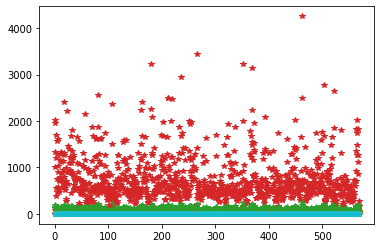

In [70]:
plt.plot(x_train,'*')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

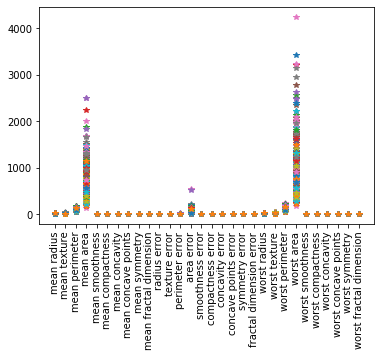

In [71]:
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')

In [0]:
x_binarised_3_train=x_train['mean area'].map(lambda x:0 if x<1000 else 1)

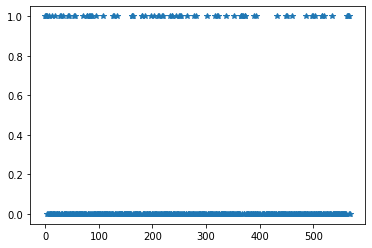

In [73]:
plt.plot(x_binarised_3_train,'*')

In [0]:
x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[1,0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

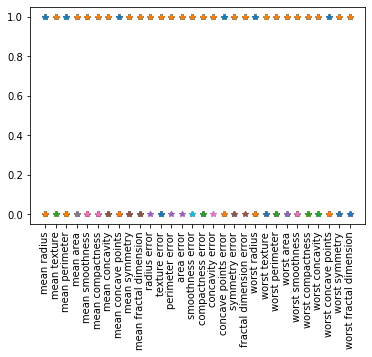

In [75]:
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation='vertical')

In [0]:
x_binarised_test=x_test.apply(pd.cut,bins=2,labels=[1,0])

In [77]:
type(x_binarised_test)

pandas.core.frame.DataFrame

In [0]:
x_binarised_train=x_binarised_train.values
x_binarised_test=x_binarised_test.values

# mp_nueron_model

In [79]:
from random import randint
import numpy as np
b=3
i=randint(0,x_binarised_train.shape[0])
print('row',i)
if(np.sum(x_binarised_train[100,:])>=b):
  print("mp nueron is malignant")
else:
  print("mp neuron is benign")
if(y_train[i]==1):
  print("malignant")
else:
  print("benign")

row 205
mp nueron is malignant
benign


In [80]:
b=3
y_pred_train=[]
accurate_rows=0
for x,y in zip(x_binarised_train,y_train):
  y_pred=(np.sum(x)>=b)
  y_pred_train.append(y_pred)
  accurate_rows+=(y==y_pred)
print(accurate_rows,accurate_rows/(x_binarised_train.shape[0]))


321 0.626953125


In [81]:
for b in range(x_binarised_train.shape[1]+1):
  y_pred_train=[]
  accurate_rows=0
  for x,y in zip(x_binarised_train,y_train):
    y_pred=(np.sum(x)>=b)
    y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)
  print(b,accurate_rows/(x_binarised_train.shape[0]))

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [0]:
from sklearn.metrics import accuracy_score

In [83]:
b=18
y_pred_test=[]
for x in x_binarised_test:
  y_pred=(np.sum(x)>=b)
  y_pred_test.append(y_pred)
accuracy=accuracy_score(y_pred_test,y_test)
print(b,accuracy)

18 0.8070175438596491


#Mp Nueron Class

In [0]:
class MPNueron:
  def __init__(self):
    self.b=None
  
  def model(self,x):
    return(sum(x)>=self.b)
  
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self,X,Y):
    accuracy={}
    
    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)
      
    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b
    
    print('optimal value is:',best_b)
    print('highest accuracy is',accuracy[best_b])

In [85]:
mp_nueron=MPNueron()
mp_nueron.fit(x_binarised_train,y_train)

optimal value is: 28
highest accuracy is 0.849609375


In [0]:
y_test_pred=mp_nueron.predict(x_binarised_test)
accuracy_test=accuracy_score(y_test_pred,y_test)

In [87]:
print(accuracy_test)

0.7894736842105263


# perceptron class

In [0]:
class Perceptron:
  
  def __init__(self):
    self.w=None
    self.b=None
    
  def model(self,x):
    return 1 if(np.dot(self.w,x)>=self.b) else 0
    
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self,X,Y,epochs=1,lr=1):
    self.w=np.ones(X.shape[1])
    self.b=0
    accuracy={}
    max_accuracy=0
    wt_matrix=[]
    for i in range(epochs):
      
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b+lr*1
      
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1
      wt_matrix.append(self.w)  
      accuracy[i]=accuracy_score(self.predict(X),Y) 
      if(accuracy[i]>max_accuracy):
        max_accuracy=accuracy[i]
        chkptw=self.w
        chkptb=self.b
     
    self.w=chkptw
    self.b=chkptb
    print(max_accuracy)
        
    plt.plot(accuracy.values()) 
    plt.ylim([0,1])
    return np.array(wt_matrix)
    

In [0]:
perceptron=Perceptron()

0.931640625


TypeError: ignored

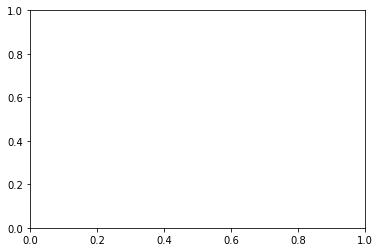

In [100]:
wt_matrix=perceptron.fit(x_binarised_train,y_train)

In [93]:
plt.plot(wt_matrix[-1,:])

NameError: ignored

In [94]:
y_pred_train=perceptron.predict(x_train)
print(accuracy_score(y_pred_train,y_train))

0.373046875


In [105]:
y_pred_test=perceptron.predict(x_test)
print(accuracy_score(y_pred_test,y_test))

0.3684210526315789


In [0]:
matplotlib inline

In [0]:
from matplotlib import animation,rc
from IPython.display import HTML

NameError: ignored

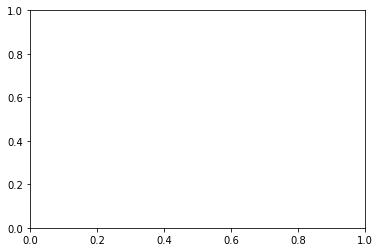

In [101]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-200, 600))

line, = ax.plot([], [], lw=2)

In [0]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [103]:
anim = animation.FuncAnimation(fig, animate,frames=100, interval=2000, 
                               blit=True)

NameError: ignored

In [104]:
HTML(anim.to_html5_video())

NameError: ignored